## 1.Import the dataset and explore basic info (nulls, data types) ##

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [39]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.shape

(891, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Handling missing values ##
Age: fill with median because median is often better than mean for skewed data
Embarked: fill with mode i.e most frequent
Cabin: drop or create a new feature because it’s mostly missing

In [44]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age']

C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipykernel_11824\4042823340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [45]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked']

C:\Users\SANJAY PATIL M\AppData\Local\Temp\ipykernel_11824\2157698975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [46]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)
df['Has_Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Has_Cabin, Length: 891, dtype: int64

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

## 3.Convert categorical features into numerical using encoding. ##

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [49]:
#Encode Sex:  0-> Male 1-> Female
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [50]:
# one hot encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,False,True


In [51]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Encode Title using map or one-hot
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

In [52]:
df.drop('Ticket', axis=1, inplace=True)

In [54]:
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Has_Cabin    891 non-null    int64  
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Rare   891 non-null    bool   
dtypes: bool(6), float64(2), int64(7)
memory usage: 68.0 KB


##  4.Normalize/standardize the numerical features. ##

In [55]:
from sklearn.preprocessing import StandardScaler

# Pick numeric columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Scale and overwrite
df[num_cols] = scaler.fit_transform(df[num_cols])


In [56]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,0,False,True,False,True,False,False
1,2,1,1,1,0.663861,0.432793,-0.473674,0.786845,1,False,False,False,False,True,False
2,3,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,0,False,True,True,False,False,False
3,4,1,1,1,0.433312,0.432793,-0.473674,0.420730,1,False,True,False,False,True,False
4,5,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,0,False,True,False,True,False,False


##  5.Visualize outliers using boxplots and remove them. ##

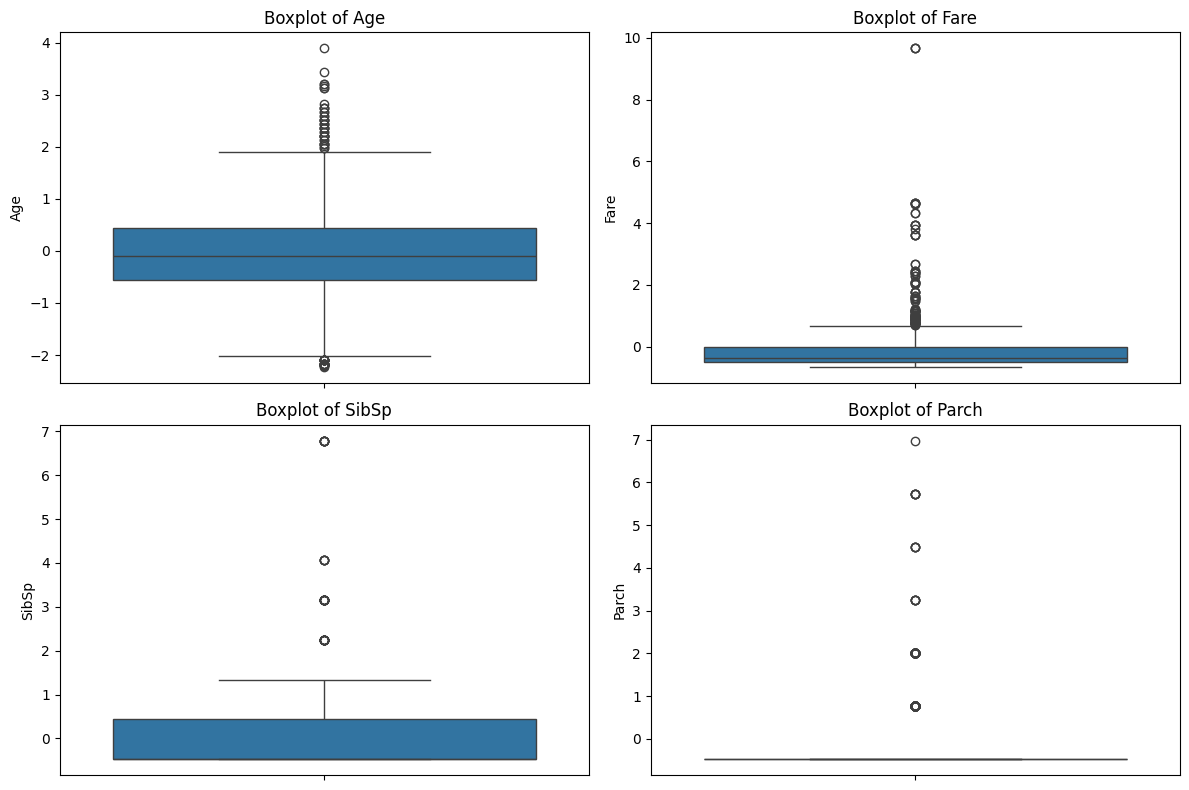

In [57]:
#visualizing outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [58]:
#removing outliers
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers(df, num_cols)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,0,False,True,False,True,False,False
2,3,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,0,False,True,True,False,False,False
3,4,1,1,1,0.433312,0.432793,-0.473674,0.420730,1,False,True,False,False,True,False
4,5,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,0,False,True,False,True,False,False
5,6,0,3,0,-0.104637,-0.474545,-0.473674,-0.478116,0,True,False,False,True,False,False


In [60]:
df.shape

(577, 15)

In [61]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000,577.000000
mean,450.590988,0.299827,2.502600,0.247834,-0.004480,-0.293706,-4.736736e-01,-0.347884,0.135182
std,259.568357,0.458579,0.733909,0.432129,0.657194,0.403796,1.111186e-16,0.253828,0.342215
min,1.000000,0.000000,1.000000,0.000000,-1.872184,-0.474545,-4.736736e-01,-0.648422,0.000000
25%,222.000000,0.000000,2.000000,0.000000,-0.412037,-0.474545,-4.736736e-01,-0.491874,0.000000
50%,455.000000,0.000000,3.000000,0.000000,-0.104637,-0.474545,-4.736736e-01,-0.474005,0.000000
75%,676.000000,1.000000,3.000000,0.000000,0.241187,-0.474545,-4.736736e-01,-0.329287,0.000000
max,891.000000,1.000000,3.000000,1.000000,1.893459,1.340132,-4.736736e-01,0.583318,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Sex          577 non-null    int64  
 4   Age          577 non-null    float64
 5   SibSp        577 non-null    float64
 6   Parch        577 non-null    float64
 7   Fare         577 non-null    float64
 8   Has_Cabin    577 non-null    int64  
 9   Embarked_Q   577 non-null    bool   
 10  Embarked_S   577 non-null    bool   
 11  Title_Miss   577 non-null    bool   
 12  Title_Mr     577 non-null    bool   
 13  Title_Mrs    577 non-null    bool   
 14  Title_Rare   577 non-null    bool   
dtypes: bool(6), float64(4), int64(5)
memory usage: 48.5 KB


## Visualizing Correlatons between the features using HeatMap ##

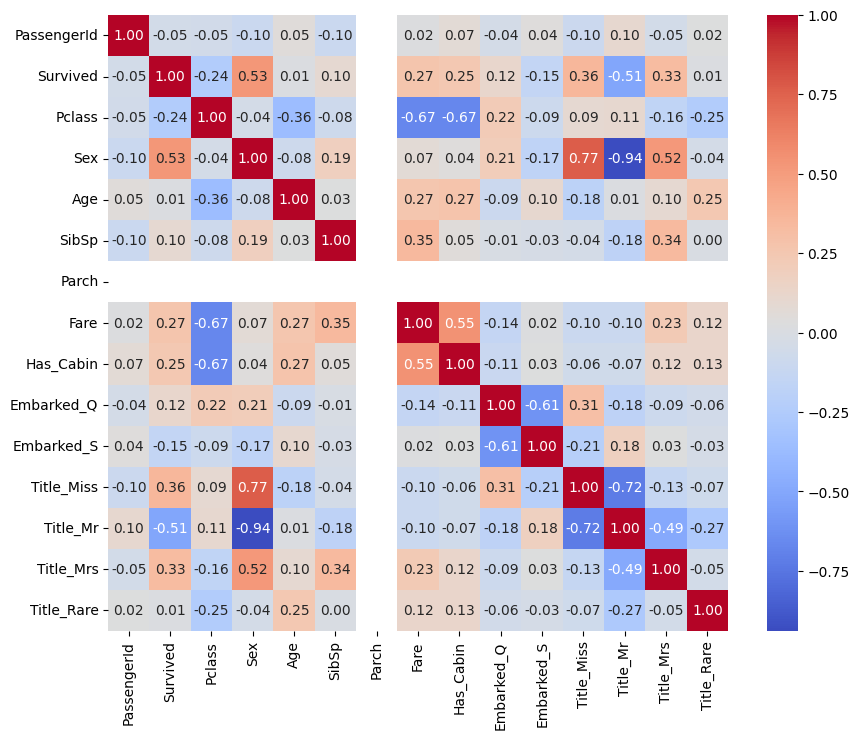

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [69]:
df.drop(['Title_Mrs','Title_Mr'], axis = 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Rare
0,1,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,0,False,True,False,False
2,3,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,0,False,True,True,False
3,4,1,1,1,0.433312,0.432793,-0.473674,0.420730,1,False,True,False,False
4,5,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,0,False,True,False,False
5,6,0,3,0,-0.104637,-0.474545,-0.473674,-0.478116,0,True,False,False,False
